# Cluster Analysis

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Load data
import seaborn as sns
iris = sns.load_dataset('iris')

In [17]:
# X only dataframe
DF = iris.iloc[:, :-1].copy()
DF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K-means Clustering

### 1) Modeling
- n_clusters : 군집 개수 지정
- init : 초기 중심 설정 방식(기본값)
- max_iter : 최대 반복 횟수

In [18]:
from sklearn.cluster import KMeans

In [19]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters = 3, 
                  init ='k-means++', 
                  max_iter = 15, 
                  random_state = 2045)

kmeans_3.fit(DF)

KMeans(max_iter=15, n_clusters=3, random_state=2045)

### 2) Clustering Results

In [20]:
kmeans_3.n_iter_ 

5

In [21]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [22]:
kmeans_3.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [23]:
kmeans_3.inertia_ 

78.85144142614601

### 3) Scree plot

In [24]:
# k 군집 분석
inertia = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(DF)
    inertia.append(kmeanModel.inertia_)

In [25]:
inertia

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.37852258610955,
 29.988943950786055,
 28.2150698862541]

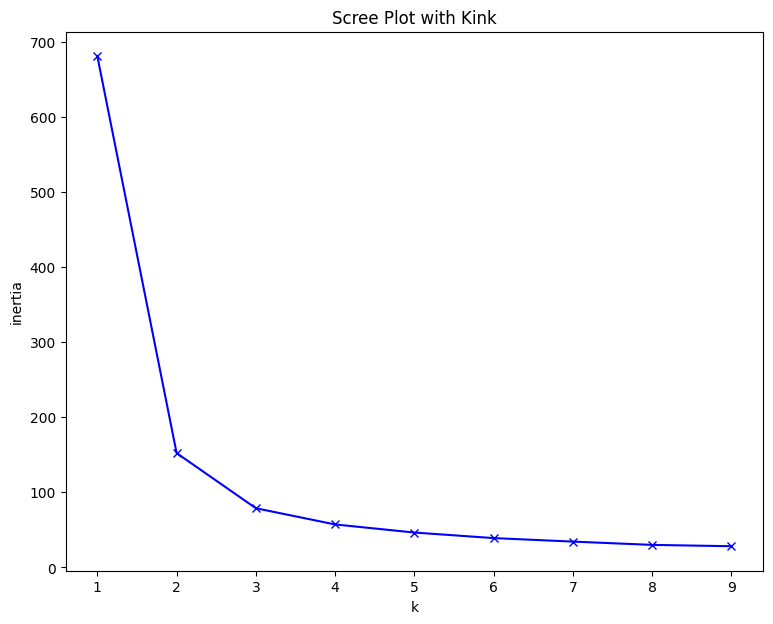

In [26]:
# Plot the elbow
plt.figure(figsize = (9, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()

### 4) Visualization with PCA

In [27]:
DF['cluster'] = kmeans_3.labels_
DF['target'] = iris.species 

In [28]:
# 군집 결과 확인
DF.groupby('target')['cluster'].value_counts()

target      cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   2          36
            0          14
Name: count, dtype: int64

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# PCA 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.iloc[:, :-1])
print(pca.explained_variance_ratio_) # 설명력
pca_transformed[:5]

[0.92461872 0.05306648]


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [31]:
DF['pca_x'] = pca_transformed[:, 0]
DF['pca_y'] = pca_transformed[:, 1]

In [32]:
idx_0 = DF[DF['cluster'] == 0].index
idx_1 = DF[DF['cluster'] == 1].index
idx_2 = DF[DF['cluster'] == 2].index

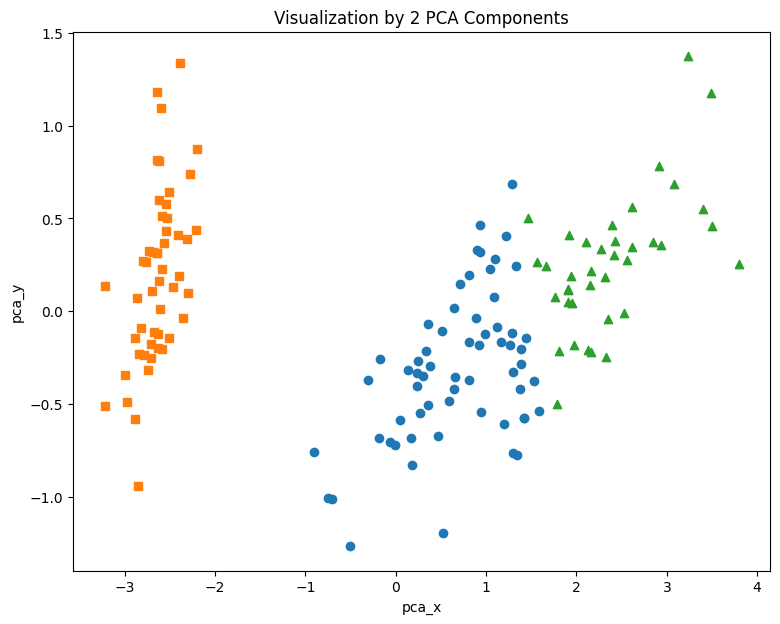

In [33]:
plt.figure(figsize = (9, 7))
plt.scatter(x = DF.loc[idx_0, 'pca_x'], 
            y = DF.loc[idx_0, 'pca_y'], 
            marker = 'o')
plt.scatter(x = DF.loc[idx_1, 'pca_x'], 
            y = DF.loc[idx_1, 'pca_y'], 
            marker = 's')
plt.scatter(x = DF.loc[idx_2, 'pca_x'], 
            y = DF.loc[idx_2, 'pca_y'], 
            marker = '^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visualization by 2 PCA Components')
plt.show()

### 5) Silhouette Analysis

- 각 군집 간의 거리가 얼마나 효율적으로 분리되었는지 성능 평가
  - 다른 군집과의 거리는 멀고, 군집 내 데이터 포인트 간의 거리는 가깝게 형성    
</br></br>
- 실수엣 계수(Silhouette Coefficient) 측정지표
  - 개별 데이터 포인트가 가지는 군집화 지표
  - 데이터 포인트가 같은 군집 내의 다른 데이터 포인트와 얼나마 가깝게 군집되어 있고
  - 다른 군집에 있는 데이터 포인트와 얼마나 멀게 분리되어 있는지 나타내는 지표

In [34]:
# DF에 'Clustering' 추가
DF['Clustering'] = kmeans_3.labels_


In [35]:
DF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,Clustering
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,0,virginica,1.527167,-0.375317,0
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,2


In [36]:
# 실루엣 계수 값
from sklearn.metrics import silhouette_samples

silhouette_samples(iris.iloc[:, :-1], DF['Clustering'])

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [37]:
DF['Silh_Coef'] = silhouette_samples(iris.iloc[:, :-1], DF['Clustering'])

In [38]:
DF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y,Clustering,Silh_Coef
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397,1,0.852955
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001,1,0.815495
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949,1,0.829315
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299,1,0.805014
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755,1,0.849302


In [39]:
# 실루엣 점수
from sklearn.metrics import silhouette_score

silhouette_score(iris.iloc[:, :-1], DF['Clustering'])

0.5528190123564097

In [40]:
# 3개 군집의 실루엣 점수와 전체 실루엣 점수 비교
DF.groupby('Clustering')['Silh_Coef'].mean()

Clustering
0    0.417320
1    0.798140
2    0.451105
Name: Silh_Coef, dtype: float64

In [42]:
# 시각화
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 12.3 MB/s eta 0:00:00


In [43]:
from yellowbrick.cluster import SilhouetteVisualizer
#print 함수 없이 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=15, n_clusters=3,
                                      random_state=2045))

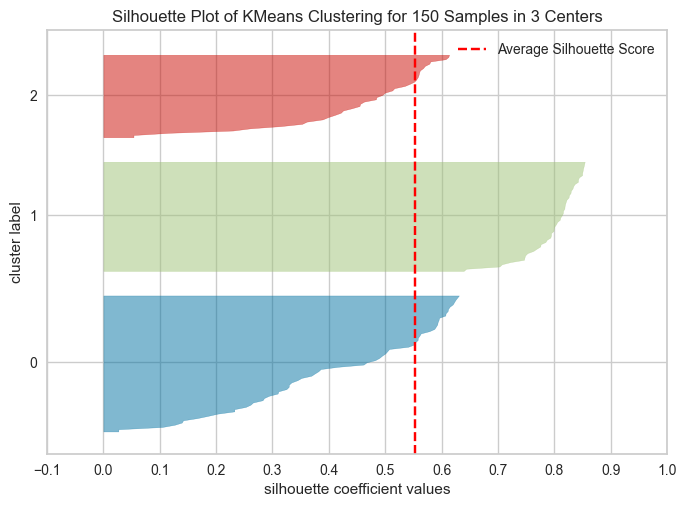

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
#visualizer 생성
visualizer_3 = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])      
visualizer_3.show()

# K-NN

- K최근접 이웃 알고리즘(지도학습 분류) *어떤 범주로 나누어져 있는 데이터 셋이 있을 때(지도학습), 새로운 데이터가 추가된다면 이를 어떤 범주로 분류할 것인지를 결정할 때 사용할 수 있는 분류 알고리즘.
- K는 투표 과정에 참여할 최근접 이웃의 개수 파라미터

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터
breast_cancer_data = load_breast_cancer() 

In [47]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [48]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [50]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [51]:
df_labels.value_counts()

1    357
0    212
Name: count, dtype: int64

In [52]:
print(breast_cancer_data.target_names) # 악성, 양성

['malignant' 'benign']


## 정규화

In [53]:
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [54]:
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 데이터셋 분리

In [55]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [56]:
print(len(train_X), len(train_y) , len(test_X), len(test_y))

455 455 114 114


## 모델링

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [58]:
classifier.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

## 평가

In [59]:
classifier.score(test_X, test_y)

0.9649122807017544

## k=1~100 시각화

In [61]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.2 MB/s eta 0:00:00


  0%|                                                   | 0/100 [00:00<?, ?it/s]

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

  2%|▊                                          | 2/100 [00:00<00:09, 10.15it/s]

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

  6%|██▌                                        | 6/100 [00:00<00:04, 20.77it/s]

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

 16%|██████▋                                   | 16/100 [00:00<00:01, 48.31it/s]

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

 31%|█████████████                             | 31/100 [00:00<00:00, 81.40it/s]

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

KNeighborsClassifier(n_neighbors=40)

KNeighborsClassifier(n_neighbors=41)

 41%|█████████████████▏                        | 41/100 [00:00<00:00, 84.10it/s]

KNeighborsClassifier(n_neighbors=42)

KNeighborsClassifier(n_neighbors=43)

KNeighborsClassifier(n_neighbors=44)

KNeighborsClassifier(n_neighbors=45)

KNeighborsClassifier(n_neighbors=46)

KNeighborsClassifier(n_neighbors=47)

KNeighborsClassifier(n_neighbors=48)

KNeighborsClassifier(n_neighbors=49)

KNeighborsClassifier(n_neighbors=50)

KNeighborsClassifier(n_neighbors=51)

KNeighborsClassifier(n_neighbors=52)

KNeighborsClassifier(n_neighbors=53)

KNeighborsClassifier(n_neighbors=54)

KNeighborsClassifier(n_neighbors=55)

 55%|███████████████████████                   | 55/100 [00:00<00:00, 98.73it/s]

KNeighborsClassifier(n_neighbors=56)

KNeighborsClassifier(n_neighbors=57)

KNeighborsClassifier(n_neighbors=58)

KNeighborsClassifier(n_neighbors=59)

KNeighborsClassifier(n_neighbors=60)

KNeighborsClassifier(n_neighbors=61)

KNeighborsClassifier(n_neighbors=62)

KNeighborsClassifier(n_neighbors=63)

KNeighborsClassifier(n_neighbors=64)

KNeighborsClassifier(n_neighbors=65)

KNeighborsClassifier(n_neighbors=66)

KNeighborsClassifier(n_neighbors=67)

KNeighborsClassifier(n_neighbors=68)

 68%|███████████████████████████▉             | 68/100 [00:00<00:00, 107.89it/s]

KNeighborsClassifier(n_neighbors=69)

KNeighborsClassifier(n_neighbors=70)

KNeighborsClassifier(n_neighbors=71)

KNeighborsClassifier(n_neighbors=72)

KNeighborsClassifier(n_neighbors=73)

KNeighborsClassifier(n_neighbors=74)

KNeighborsClassifier(n_neighbors=75)

KNeighborsClassifier(n_neighbors=76)

KNeighborsClassifier(n_neighbors=77)

KNeighborsClassifier(n_neighbors=78)

KNeighborsClassifier(n_neighbors=79)

KNeighborsClassifier(n_neighbors=80)

KNeighborsClassifier(n_neighbors=81)

KNeighborsClassifier(n_neighbors=82)

KNeighborsClassifier(n_neighbors=83)

 83%|██████████████████████████████████       | 83/100 [00:00<00:00, 118.47it/s]

KNeighborsClassifier(n_neighbors=84)

KNeighborsClassifier(n_neighbors=85)

KNeighborsClassifier(n_neighbors=86)

KNeighborsClassifier(n_neighbors=87)

KNeighborsClassifier(n_neighbors=88)

KNeighborsClassifier(n_neighbors=89)

KNeighborsClassifier(n_neighbors=90)

KNeighborsClassifier(n_neighbors=91)

KNeighborsClassifier(n_neighbors=92)

KNeighborsClassifier(n_neighbors=93)

KNeighborsClassifier(n_neighbors=94)

KNeighborsClassifier(n_neighbors=95)

KNeighborsClassifier(n_neighbors=96)

 96%|███████████████████████████████████████▎ | 96/100 [00:01<00:00, 115.38it/s]

KNeighborsClassifier(n_neighbors=97)

KNeighborsClassifier(n_neighbors=98)

KNeighborsClassifier(n_neighbors=99)

KNeighborsClassifier(n_neighbors=100)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 90.78it/s]


Text(0.5, 0, 'k')

Text(0, 0.5, 'Validation Accuracy')

Text(0.5, 1.0, 'Breast Cancer Classifier Accuracy')

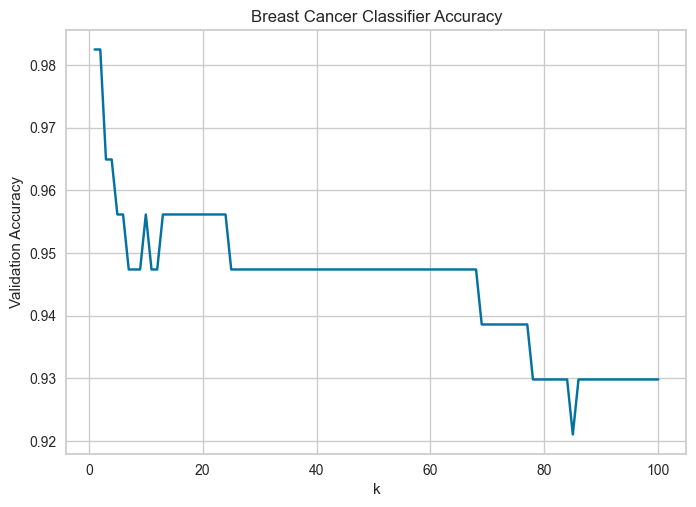

In [64]:
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar

k_list = range(1,101)
accuracies = []
for k in tqdm(k_list):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_X, train_y)
  accuracies.append(classifier.score(test_X, test_y))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()